In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞ ÏúÑÌï¥
%matplotlib inline

# Í∑∏ÎûòÌîÑÏóêÏÑú Í≤©ÏûêÎ°ú Ïà´Ïûê Î≤îÏúÑÍ∞Ä ÎààÏóê Ïûò ÎùÑÎèÑÎ°ù
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

# 1. Dataset ÌôïÏù∏

In [2]:
df_train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
df_test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [3]:
df_train.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  

[3 rows x 81 columns]

In [4]:
df_test.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  

[3 rows x 80 columns]

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
pd.set_option('display.max_columns', None) # Î™®Îì† Ïó¥ Ï∂úÎ†•

df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

## 1.1 Ï¢ÖÏÜçÎ≥ÄÏàò Î∂ÑÌè¨

In [7]:
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

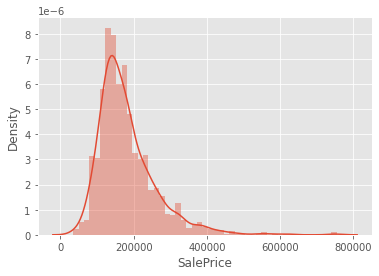

In [8]:
sns.distplot(df_train['SalePrice'])

In [9]:
# ID Î≥ÄÏàò Îî∞Î°ú ÎñºÏñ¥ ÎÜìÍ∏∞
id_test = df_test['Id']

## 1.2 Í≤∞Ï∏°Ïπò ÌôïÏù∏

<AxesSubplot:>

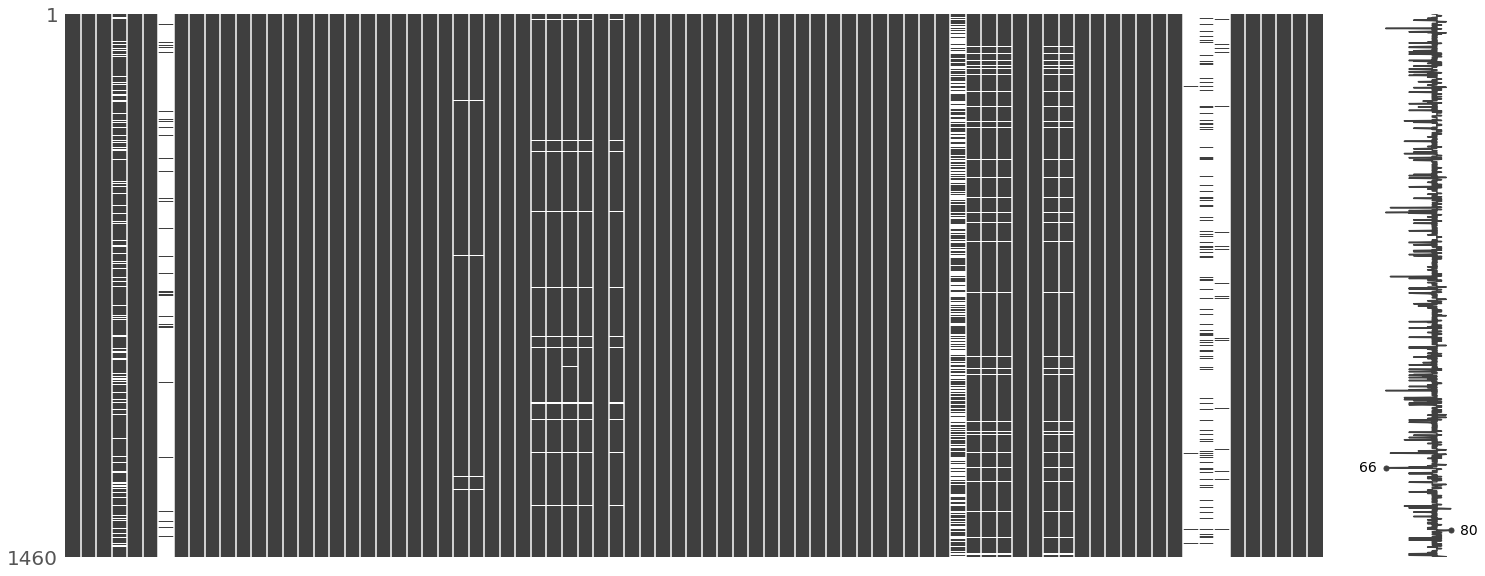

In [10]:
msno.matrix(df_train)

In [11]:
# Í∞Å Ïó¥Ïùò NaN ÎπÑÏú® ÏïåÏïÑÎ≥¥Í∏∞

for col in df_train.columns:
    if df_train[col].isnull().sum() > 0 :
        msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))

        print(msg)

column: LotFrontage	 Percent of NaN value: 17.74%
column:      Alley	 Percent of NaN value: 93.77%
column: MasVnrType	 Percent of NaN value: 0.55%
column: MasVnrArea	 Percent of NaN value: 0.55%
column:   BsmtQual	 Percent of NaN value: 2.53%
column:   BsmtCond	 Percent of NaN value: 2.53%
column: BsmtExposure	 Percent of NaN value: 2.60%
column: BsmtFinType1	 Percent of NaN value: 2.53%
column: BsmtFinType2	 Percent of NaN value: 2.60%
column: Electrical	 Percent of NaN value: 0.07%
column: FireplaceQu	 Percent of NaN value: 47.26%
column: GarageType	 Percent of NaN value: 5.55%
column: GarageYrBlt	 Percent of NaN value: 5.55%
column: GarageFinish	 Percent of NaN value: 5.55%
column: GarageQual	 Percent of NaN value: 5.55%
column: GarageCond	 Percent of NaN value: 5.55%
column:     PoolQC	 Percent of NaN value: 99.52%
column:      Fence	 Percent of NaN value: 80.75%
column: MiscFeature	 Percent of NaN value: 96.30%


- LotFrontage (17.74%) : ÏßÅÏÑ† ÌîºÌä∏
- Alley (93.77%) : Í≥®Î™© Ï¢ÖÎ•ò
- FireplaceQu (47.26%) : Î≤ΩÎÇúÎ°úÏùò Ïßà
- PoolQC (99.52%) : ÌíÄÏùò Ïßà
- Fence (80.75%) : Ïö∏ÌÉÄÎ¶¨Ïùò Ïßà
- MiscFeatrue (96.30%) : Ïù¥Í≤ÉÏ†ÄÍ≤É Îã§ÏñëÌïú ÌäπÏßï

In [12]:
for col in df_test.columns:
    if df_test[col].isnull().sum() > 0 :
        msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_test[col].isnull().sum() / df_test[col].shape[0]))

        print(msg)

column:   MSZoning	 Percent of NaN value: 0.27%
column: LotFrontage	 Percent of NaN value: 15.56%
column:      Alley	 Percent of NaN value: 92.67%
column:  Utilities	 Percent of NaN value: 0.14%
column: Exterior1st	 Percent of NaN value: 0.07%
column: Exterior2nd	 Percent of NaN value: 0.07%
column: MasVnrType	 Percent of NaN value: 1.10%
column: MasVnrArea	 Percent of NaN value: 1.03%
column:   BsmtQual	 Percent of NaN value: 3.02%
column:   BsmtCond	 Percent of NaN value: 3.08%
column: BsmtExposure	 Percent of NaN value: 3.02%
column: BsmtFinType1	 Percent of NaN value: 2.88%
column: BsmtFinSF1	 Percent of NaN value: 0.07%
column: BsmtFinType2	 Percent of NaN value: 2.88%
column: BsmtFinSF2	 Percent of NaN value: 0.07%
column:  BsmtUnfSF	 Percent of NaN value: 0.07%
column: TotalBsmtSF	 Percent of NaN value: 0.07%
column: BsmtFullBath	 Percent of NaN value: 0.14%
column: BsmtHalfBath	 Percent of NaN value: 0.14%
column: KitchenQual	 Percent of NaN value: 0.07%
column: Functional	 Per

- LotFrontage (15.56%) : ÏßÅÏÑ† ÌîºÌä∏
- Alley (92.26%) : Í≥®Î™© Ï¢ÖÎ•ò
- FireplaceQu (50.03%) : Î≤ΩÎÇúÎ°úÏùò Ïßà
- PoolQC (99.79%) : ÌíÄÏùò Ïßà
- Fence (80.12%) : Ïö∏ÌÉÄÎ¶¨Ïùò Ïßà
- MiscFeatrue (96.50%) : Ïù¥Í≤ÉÏ†ÄÍ≤É Îã§ÏñëÌïú ÌäπÏßï

<AxesSubplot:>

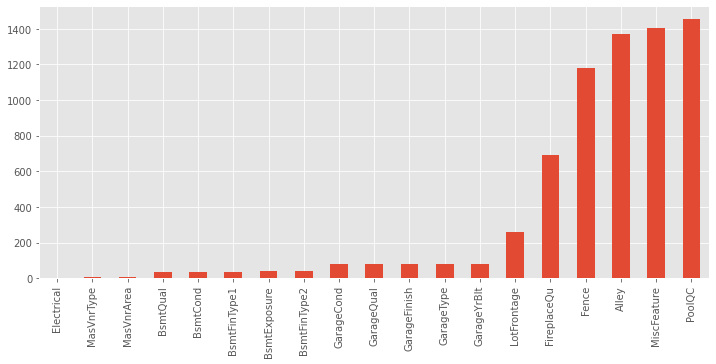

In [13]:
# null data ÏãúÍ∞ÅÌôî
null_d = df_train.isnull().sum()
null_d = null_d[null_d>0]

null_d.sort_values(inplace=True)
null_d.plot.bar(figsize=(12, 5))

#### * Ïö∞Î¶¨Í∞Ä Í≥†Î†§Ìï¥Ïïº Ìï† NaN Í∞íÎì§


1. PoolQC (ÌíÄÏùò Ï¢ÖÎ•ò) - ÌíÄÏù¥ ÏóÜÏùå
2. MiscFeature (Í∏∞ÌÉÄ Í∏∞Îä•) - Í∏∞ÌÉÄ Í∏∞Îä• ÏóÜÏùå
3. Alley (Í≥®Î™©Ïùò Ï¢ÖÎ•ò) - Í≥®Î™© ÏóÜÏùå
4. Fence (Ïö∏ÌÉÄÎ¶¨Ïùò Ïßà) - Ïö∏ÌÉÄÎ¶¨ ÏóÜÏùå
5. FireplaceQu (Î≤ΩÎÇúÎ°úÏùò Ïßà) - Î≤ΩÎÇúÎ°ú ÏóÜÏùå


- ÏúÑ featureÎì§Ïùò nanÍ∞íÎì§ÏùÄ Í∞íÏù¥ Ï†ÄÏû•ÎêòÏßÄ ÏïäÏùÄ Í≤ÉÏù¥ ÏïÑÎãàÎùº 'ÏóÜÏùå'ÏùÑ ÏùòÎØ∏
    - ÎÇòÏ§ëÏóê ÌèâÍ∑†, Ï§ëÏïôÍ∞íÏúºÎ°ú ÎåÄÏ≤¥ÌïòÏûê


- Í∑∏ Ïô∏ featureÎì§Ïùò nan Í∞íÏùÄ Ï†úÍ±∞ÌïòÍ±∞ÎÇò 0ÏúºÎ°ú ÎåÄÏ≤¥

In [14]:
# categoricÌòï Îç∞Ïù¥ÌÑ∞ÏôÄ numericÌòï Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÌôïÏù∏

cat_features = df_train.dtypes[df_train.dtypes == 'object'].index
num_features = df_train.dtypes[df_train.dtypes != 'object'].index

print("categorical features: ", len(cat_features))
print("numeric features: ", len(num_features))

categorical features:  43
numeric features:  38


In [15]:
# categoricalÌòï Îç∞Ïù¥ÌÑ∞
cat_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [16]:
# numericÌòï Îç∞Ïù¥ÌÑ∞
num_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

> (+) Ïó¨Í∏∞ÏÑú ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞Ïù¥ÏßÄÎßå Î≤îÏ£ºÌòï ÏùòÎØ∏Î•º Í∞ÄÏßÄÎäî featureÎ•º Ï≤òÎ¶¨Ìï¥Ï£ºÏûê

<!-- - Id : Îã®ÏàúÌûà ÏÇ¨Ïö©ÏûêÎ•º Íµ¨Î∂ÑÌïòÎäî id -->
- MsSubClass : ÎπåÎî© class
- OverallQual : Ï†ÑÏ≤¥Ï†ÅÏù∏ quality
- OverallCond : Ïßë condition

In [17]:
cat_features = list(set(cat_features)) + list(set(["MSSubClass", "OverallQual", "OverallCond"]))
cat_features

['HouseStyle',
 'Neighborhood',
 'PoolQC',
 'ExterQual',
 'Heating',
 'GarageFinish',
 'LandSlope',
 'Condition2',
 'SaleCondition',
 'Exterior2nd',
 'Electrical',
 'BldgType',
 'BsmtQual',
 'KitchenQual',
 'LotConfig',
 'SaleType',
 'Exterior1st',
 'BsmtCond',
 'GarageCond',
 'BsmtExposure',
 'FireplaceQu',
 'Foundation',
 'HeatingQC',
 'MasVnrType',
 'PavedDrive',
 'Functional',
 'GarageQual',
 'Utilities',
 'Condition1',
 'CentralAir',
 'Alley',
 'BsmtFinType1',
 'MiscFeature',
 'Fence',
 'ExterCond',
 'LandContour',
 'BsmtFinType2',
 'MSZoning',
 'LotShape',
 'GarageType',
 'RoofMatl',
 'Street',
 'RoofStyle',
 'OverallQual',
 'MSSubClass',
 'OverallCond']

In [18]:
num_features = list(set(num_features) - set(["MSSubClass", "OverallQual", "OverallCond"]))
num_features

['GarageCars',
 'TotalBsmtSF',
 'LotFrontage',
 'MiscVal',
 'FullBath',
 'EnclosedPorch',
 'TotRmsAbvGrd',
 'YearBuilt',
 'LowQualFinSF',
 'MasVnrArea',
 'BsmtUnfSF',
 'WoodDeckSF',
 'BedroomAbvGr',
 'BsmtHalfBath',
 'GarageArea',
 '3SsnPorch',
 'LotArea',
 '1stFlrSF',
 'SalePrice',
 'YearRemodAdd',
 'KitchenAbvGr',
 'HalfBath',
 'OpenPorchSF',
 'BsmtFinSF2',
 'BsmtFinSF1',
 'ScreenPorch',
 'PoolArea',
 'Fireplaces',
 'GrLivArea',
 'MoSold',
 'GarageYrBlt',
 '2ndFlrSF',
 'YrSold',
 'BsmtFullBath',
 'Id']

In [19]:
# Ïó¨Í∏∞ÏÑú Ïö∞Î¶¨Í∞Ä ÏòàÏ∏°Ìï¥ÏïºÌï† SalePriceÎäî Îî∞Î°ú ÎñºÏñ¥Ï£ºÏûê
label = df_train["SalePrice"]

num_features = list(set(num_features) - set(["SalePrice"]))
num_features

['GarageCars',
 'TotalBsmtSF',
 'LotFrontage',
 'MiscVal',
 'FullBath',
 'EnclosedPorch',
 'TotRmsAbvGrd',
 'YearBuilt',
 'LowQualFinSF',
 'MasVnrArea',
 'BsmtUnfSF',
 'WoodDeckSF',
 'BedroomAbvGr',
 'BsmtHalfBath',
 'GarageArea',
 '3SsnPorch',
 'LotArea',
 '1stFlrSF',
 'YearRemodAdd',
 'KitchenAbvGr',
 'HalfBath',
 'OpenPorchSF',
 'BsmtFinSF2',
 'ScreenPorch',
 'BsmtFinSF1',
 'PoolArea',
 'Fireplaces',
 'GrLivArea',
 'MoSold',
 'GarageYrBlt',
 '2ndFlrSF',
 'YrSold',
 'BsmtFullBath',
 'Id']

## 1.3 Ïù¥ÏÉÅÏπò ÌôïÏù∏ Î∞è Ï†úÍ±∞
- ÏÇ¨Î∂ÑÏúÑ Î≤îÏúÑ(IQR, interquartiel range)Î•º Í∏∞Î∞òÏúºÎ°ú
- IQR : Ï†ú 3ÏÇ¨Î∂ÑÏúÑ - Ï†ú 1ÏÇ¨Î∂ÑÏúÑ
    - IQR = Q3 - Q1

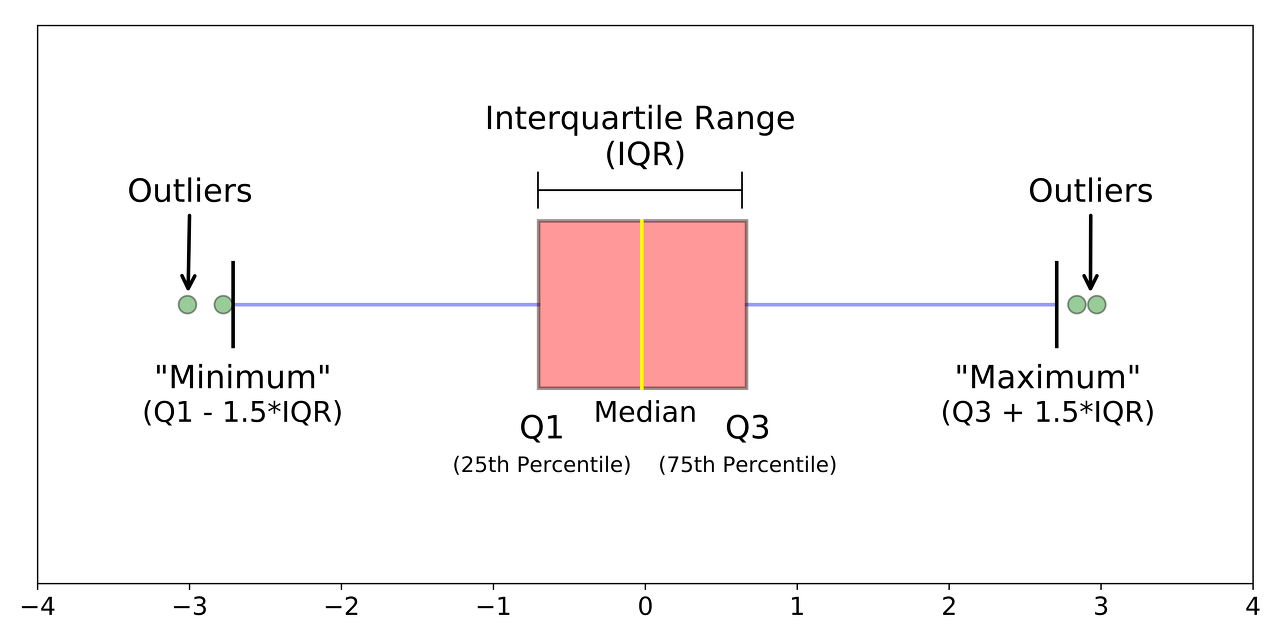!
(Ï∂úÏ≤ò: https://hong-yp-ml-records.tistory.com/15)

In [20]:
# Ïù¥ÏÉÅÏπò ÌÉêÏÉâ Î∞è Ï†úÍ±∞ (ÌäúÌÇ§Ïùò Î∞©Î≤ï Ïù¥Ïö©)

from collections import Counter

def get_outlier(df, features):
    outlier_idx = []
    
    for col in features:
        q1, q3 = np.percentile(df[col], [25, 75])
        iqr = q3-q1 # (ÏÉÅÏúÑ 75% ÏßÄÏ†êÏùò Í∞í) - (ÌïòÏúÑ 25% ÏßÄÏ†êÏùò Í∞í)
                    
        lower_bound = q1 - (iqr*1.5) # ÏµúÏÜå Ï†úÌïúÏÑ†
        upper_bound = q3 + (iqr*1.5) # ÏµúÎåÄ Ï†úÌïúÏÑ†
        
        # ÏµúÏÜå Ï†úÌïúÏÑ†, ÏµúÎåÄ Ï†úÌïúÏÑ† ÎÑòÏñ¥Í∞ÄÎäî Í∞íÎì§ÏùÑ Í∞ÄÏßÄÎäî Ïª¨ÎüºÏùÑ Ïù¥ÏÉÅÏπòÎ•º Í∞ÄÏßÄÎäî Ïª¨ÎüºÏù¥Îùº ÏÉùÍ∞Å
        outlier_col = df[(df[col]<lower_bound) | (df[col]>upper_bound)].index
        outlier_idx.extend(outlier_col) # Îπà Ïù∏Îç±Ïä§Ïóê Ïù¥ÏÉÅÏπò Í∞ÄÏßÄÎäî Ïª¨Îüº Ï∂îÍ∞Ä
        
    outlier_idx = Counter(outlier_idx) # Ïù¥ÏÉÅÏπò Ïª¨Îüº Í∞úÏàò Ïπ¥Ïö¥ÌåÖ
    multiple_outliers = list(k for k, v in outlier_idx.items() if v>2) # Ïù¥ÏÉÅÏπòÍ∞Ä 2Í∞ú Ï¥àÍ≥ºÎùºÎ©¥ outlier Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±
    
    return multiple_outliers


In [21]:
# ÎùºÎ≤® Ï†úÏô∏Ìïú ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞
outlier_drop = get_outlier(df_train, num_features)

# outlierÍ∞Ä Î∞úÏÉùÌïú Ìñâ Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
df_train.loc[outlier_drop]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
747    748          70       RM         65.0    11700   Pave  Pave      IR1   
1190  1191         190       RL          NaN    32463   Pave   NaN      Reg   
1350  1351          90       RL         91.0    11643   Pave   NaN      Reg   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
70      71          20       RL         95.0    13651   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1287  1288          20       RL          NaN    36500   Pave   NaN      IR1   
1184  1185          20       RL         50.0    35133   Grvl   NaN      Reg   
1346  1347          20       RL          NaN    20781   Pave   NaN      IR2   
666    667          60       RL          NaN    18450   Pave   NaN      IR1   
854    855          20       RL        102.0    17920   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
747          Lvl    AllPub    Corner       Gtl      OldTown       Norm   
1190         Low    AllPub    Inside       Mod      Mitchel       Norm   
1350         Lvl    AllPub    Inside       Gtl        NAmes     Artery   
17           Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
70           Lvl    AllPub    Inside       Gtl        NAmes       Norm   
...          ...       ...       ...       ...          ...        ...   
1287         Low    AllPub    Inside       Mod      ClearCr       Norm   
1184         Lvl    AllPub    Inside       Mod       Timber       Norm   
1346         Lvl    AllPub   CulDSac       Gtl       NWAmes       PosN   
666          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
854          Lvl    AllPub    Inside       Gtl       Sawyer       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
747        Norm     1Fam     2Story            7            7       1880   
1190       Norm   2fmCon     1Story            4            4       1961   
1350       Norm   Duplex     2Story            5            5       1969   
17         Norm   Duplex     1Story            4            5       1967   
70         Norm     1Fam     1Story            7            6       1973   
...         ...      ...        ...          ...          ...        ...   
1287       Norm     1Fam     1Story            5            5       1964   
1184       Norm     1Fam     1Story            5            4       1963   
1346       Norm     1Fam     1Story            7            7       1968   
666        Norm     1Fam     2Story            6            5       1965   
854        Norm     1Fam     1Story            5            4       1955   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
747           2003   Mansard  CompShg      Stucco      Stucco       None   
1190          1975     Gable  CompShg     MetalSd     MetalSd      Stone   
1350          1969     Gable  CompShg     MetalSd     MetalSd    BrkFace   
17            1967     Gable  CompShg     MetalSd     MetalSd       None   
70            1973     Gable  CompShg     Plywood     Plywood    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1287          1964     Gable  CompShg     Wd Sdng     Wd Sdng     BrkCmn   
1184          1963       Hip  CompShg     MetalSd     MetalSd    BrkFace   
1346          2003       Hip  CompShg     BrkFace     HdBoard       None   
666           1979      Flat  Tar&Grv     Plywood     Plywood     BrkCmn   
854           1974       Hip  CompShg     Wd Sdng     Plywood       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
747          0.0        Gd        TA      Stone       TA       Fa   
1190       149.0        TA        Gd     CBlock       TA       TA   
1350       368.0        TA        TA     CBlock       TA       TA   
17           0.0        TA        TA       Slab      NaN      NaN   

In [22]:
# Ïù¥ÏÉÅÏπò Ìè¨Ìï®Îêú Ìñâ Ï†úÍ±∞
df_train = df_train.drop(outlier_drop, axis=0)
df_train.shape

# reset_index : Ïù∏Îç±Ïä§ Í∞íÏùÑ Ïª¨ÎüºÏúºÎ°ú ÎßåÎì§Ïñ¥Ï§å
# drop=True : ÏõêÎ≥∏Ïùò Ïù∏Îç±Ïä§ ÎåÄÏ≤¥ (dropÌïòÍ≥† ÏÉàÎ°ú)

# ÌñâÏù¥ 1460 -> 1370 Î°ú Í∞êÏÜåÌï®

(1370, 81)

In [23]:
print(df_train.shape, df_test.shape)

(1370, 81) (1459, 80)


## 1.3 ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ Í≤∞Ï∏°ÏπòÏóê Í∞í Ï≤òÎ¶¨ÌïòÍ∏∞

In [24]:
# ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ - nan Í∞íÏùÄ meanÏúºÎ°ú ÎåÄÏ≤¥ (Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌñàÏúºÎØÄÎ°ú)

for col in num_features:
    if df_train[col].isnull().sum() > 0 :
        df_train[col] = df_train[col].fillna(df_train[col].mean())

for col in num_features:
    if df_test[col].isnull().sum() > 0 :
        df_test[col] = df_test[col].fillna(df_test[col].mean())

# 2. EDA
## 2.1 ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù (ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞)
- ÏàòÏπòÌòï Î≥ÄÏàò -> ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
- Î≤îÏ£ºÌòï Î≥ÄÏàò -> boxplot?
- salepriceÏôÄ Í¥ÄÍ≥ÑÍ∞Ä ÌÅ∞/ÏûëÏùÄ feature ÎÇòÎàÑÍ∏∞

<AxesSubplot:title={'center':'Corrleation of Numeric Features with SalePrice'}>

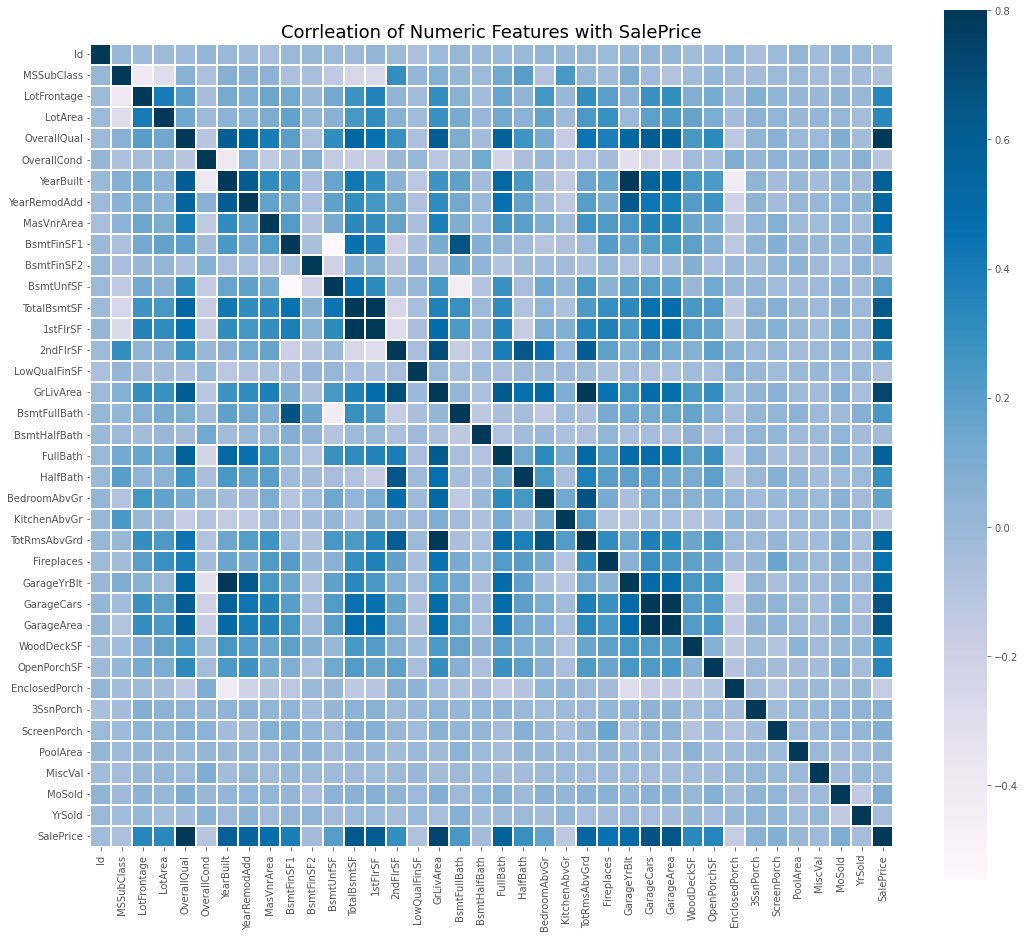

In [25]:
# ÏàòÏπòÌòï data
corr_data = df_train[['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice']]

colormap = plt.cm.PuBu

fig, ax = plt.subplots(figsize=(18, 16))
plt.title("Corrleation of Numeric Features with SalePrice", y=1, size=18)
sns.heatmap(corr_data.corr(),
            vmax=.8, # Ïª¨Îü¨Î∞î ÏµúÎåÄ ÌÅ¨Í∏∞
            linewidths=0.1, # Í≤ΩÍ≥ÑÎ©¥ Ïã§ÏÑ†ÏúºÎ°ú Íµ¨Î∂ÑÌïòÍ∏∞
            square=True,
            annot=False, # Ïã§Ï†úÍ∞í ÌëúÏãú x
            cmap=colormap, 
            linecolor="white",
            annot_kws={'size': 14})

> (+) heatmapÏúºÎ°úÎäî ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä Ìïú ÎààÏóê Îì§Ïñ¥Ïò§ÏßÄ ÏïäÏúºÎØÄÎ°ú barplotÏúºÎ°ú Í∑∏Î†§Î≥¥Ïûê

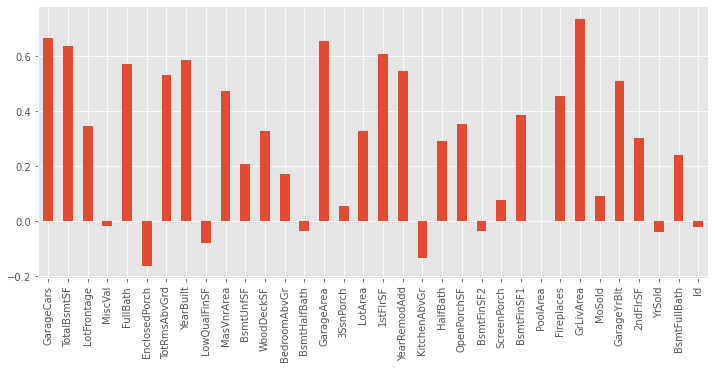

In [26]:
# Ïó¨Í∏∞ÏÑú SalePriceÍ∞Ä Ïïà Îì§Ïñ¥Í∞îÏúºÎ©¥ Îçî Ï¢ãÏïòÏùÑ ÎìØ

plt.figure(figsize=(12, 5))

df_train.corr()["SalePrice"][num_features].plot.bar()
plt.show()

- ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÑàÎ¨¥ ÎÇÆÏùÄ feature : SalePrice ÏòàÏ∏°Ïóê ÎèÑÏõÄÏù¥ Ïïà Îê®

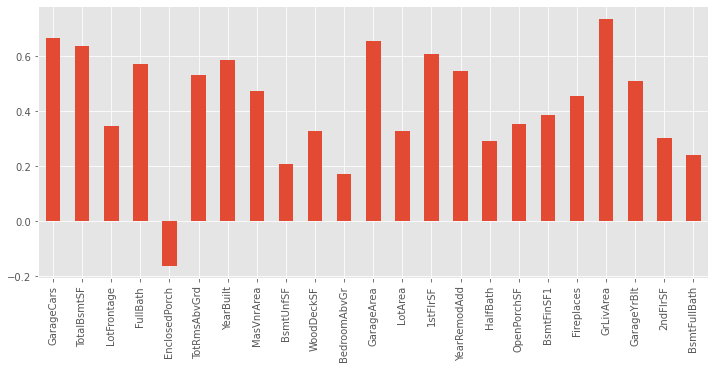

In [27]:
# ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä 0.15 Ïù¥ÏÉÅÏù∏ columnÎì§Îßå
num_features = list(filter(lambda x: abs(df_train.corr()["SalePrice"][x]) > 0.15, num_features))

plt.figure(figsize=(12, 5))
df_train.corr()["SalePrice"][num_features].plot.bar()
plt.show()

# ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨?

#### * SalePrice(ÌÉÄÍ≤ü)ÏôÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÍπäÏùÄ featureÎì§ ÌôïÏù∏

- GrLivArea
- GarageCars
- GarageArea
- TotalBsmtSF
- 1stFlrSF
- YearBuilt
- FullBath
- YearRemodAdd
- TotRmsAbvGrd
- ...

1. GrLivAreaÎäî ÏßÄÏÉÅ groundÏùò ÎÑìÏù¥Îã§. Í∞Å Ï∏µÍ≥º ÌôîÏû•Ïã§Ïùò ÎÑìÏù¥Î•º ÎÇòÌÉÄÎÇ¥Îäî 1stFlrSF, 2ndFlrSF, FullBathÎ•º ÏÇ≠Ï†ú
2. GarageÍ∞Ä ÎÑìÏúºÎ©¥ carÎèÑ ÎßéÏù¥ ÏàòÏö©Ìï† Ïàò ÏûàÏùÑ Í≤ÉÏù¥Îã§. Îî∞ÎùºÏÑú Îëò Ï§ë ÌïòÎÇòÎßå ÏÇ¨Ïö©ÌïòÏûê (ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä Îçî ÎÇÆÏùÄ GargeAreaÎäî ÏÇ≠Ï†ú)
3. TotalBsmtSFÎäî ÏßÄÌïòÏã§Ïùò ÎÑìÏù¥Î•º ÎÇòÌÉÄÎÇ∏Îã§. Îî∞ÎùºÏÑú Ïù¥ÏôÄ Í¥ÄÍ≥ÑÏûàÎäî BsmtUnfSF, BsmtFinSF1, BsmtHalfBath, BsmtFullBathÎäî ÏÇ≠Ï†ú


----

Ï¶â, 1stFlrSF, 2ndFlrSF, FullBath, GarageArea, BsmtUnfSF, BsmtFinSF1, BsmtHalfBath, BsmtfFullBath Ïª¨ÎüºÏùÄ ÏÇ≠Ï†úÌïòÏûê

<!-- - OverallQual
- GrLivArea
- GarageCars
- YearBuilt / YearRemodAdd / FullBath / TotalBsmtSF / 1stFlrSF / GarageArea -->


<!-- #### * ÏÑúÎ°ú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ featureÎì§ ÌôïÏù∏
- GarageYrBlt & YearBuilt
- TotRmsAbvGrd & GrLivArea
- 1stFlrSF & TotalBsmtSF
 -->

<AxesSubplot:title={'center':'Corrleation of Numeric Features with SalePrice'}>

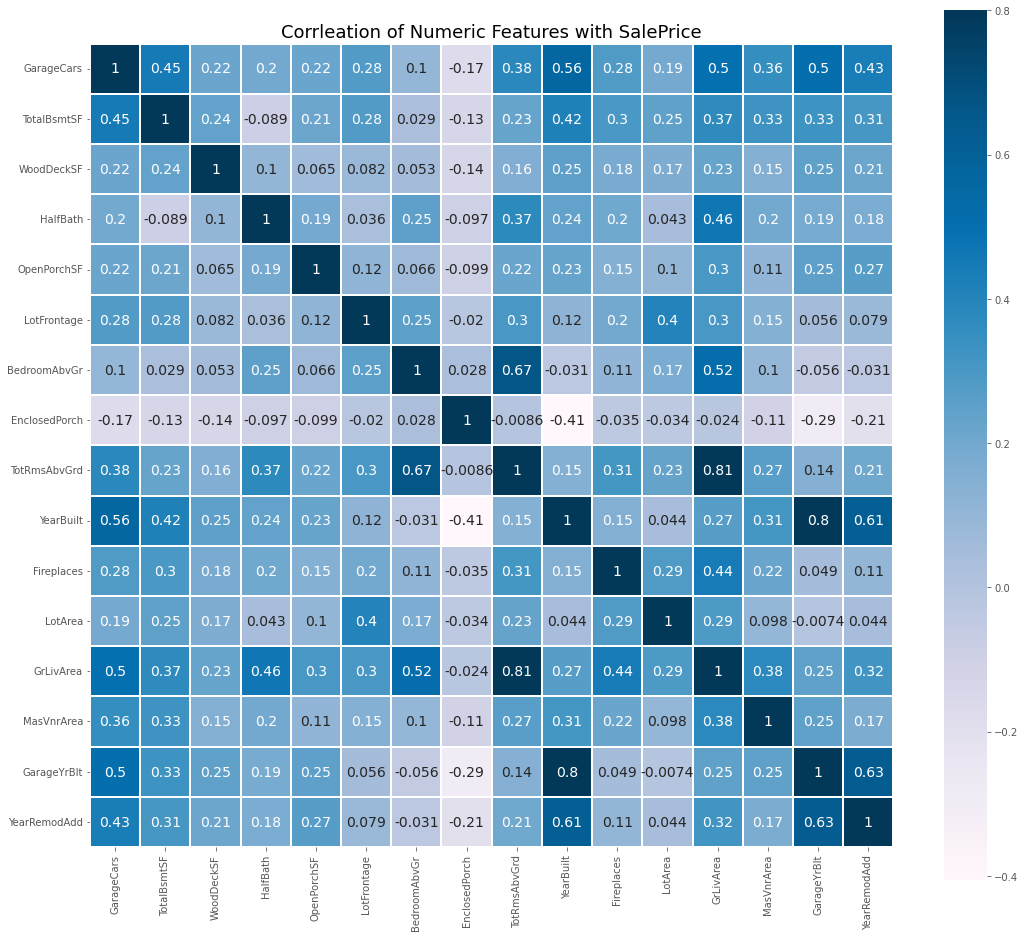

In [28]:
num_features = list(set(num_features) - set(["1stFlrSF", "2ndFlrSF", "GarageArea", "FullBath", "BsmtUnfSF", "BsmtFinSF1", "BsmtHalfBath", "BsmtFullBath"]))

colormap = plt.cm.PuBu
fig, ax = plt.subplots(figsize=(18, 16))
plt.title("Corrleation of Numeric Features with SalePrice", y=1, size=18)
sns.heatmap(df_train[num_features].corr(),
            vmax=.8, # Ïª¨Îü¨Î∞î ÏµúÎåÄ ÌÅ¨Í∏∞
            linewidths=0.1, # Í≤ΩÍ≥ÑÎ©¥ Ïã§ÏÑ†ÏúºÎ°ú Íµ¨Î∂ÑÌïòÍ∏∞
            square=True,
            annot=True, # Ïã§Ï†úÍ∞í ÌëúÏãú o
            cmap=colormap, 
            linecolor="white",
            annot_kws={'size': 14})

#### * ÏÑúÎ°ú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÄ featuresÎì§
1. YearBuiltÏôÄ GarageYrBltÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä 1Ïóê Í∞ÄÍπùÎã§. ÏßëÏù¥ ÏßÄÏñ¥Ï°åÏùÑ ÎïåÏôÄ Ï∞®Í≥†Í∞Ä ÏßÄÏñ¥Ï°åÏùÑ ÎïåÏùò Ïó∞ÎèÑÎäî ÎπÑÏä∑Ìï† Í≤ÉÏù¥ÎØÄÎ°ú SalePriceÏôÄ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÏûëÏùÄ GarageYrBltÎ•º ÏÇ≠Ï†ú
2. GrLivAreaÏôÄ TotRmsAbvGrdÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä 1Ïóê Í∞ÄÍπùÎã§. ÏßëÏùò ÎÑìÏù¥ÏôÄ Î∞©Ïùò Í≥ÑÏàòÎäî ÎπÑÎ°ÄÌï† Í≤ÉÏù¥ÎØÄÎ°ú ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÇÆÏùÄ TotRmsAbvGrdÎ•º ÏÇ≠Ï†ú
3. YearBuiltÏôÄ YearRemodAddÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä 0.6Î•º ÎÑòÎäîÎã§. ÏßëÏù¥ ÏßÄÏñ¥ÏßÑ Ïó∞ÎèÑÏôÄ Î¶¨Î™®Îç∏ÎßÅ Îêú Ïó∞ÎèÑÎäî ÎπÑÎ°ÄÌï† Í≤ÉÏù¥Îã§. ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÇÆÏùÄ YearRemodAddÎ•º ÏÇ≠Ï†ú

<AxesSubplot:title={'center':'Corrleation of Numeric Features with SalePrice'}>

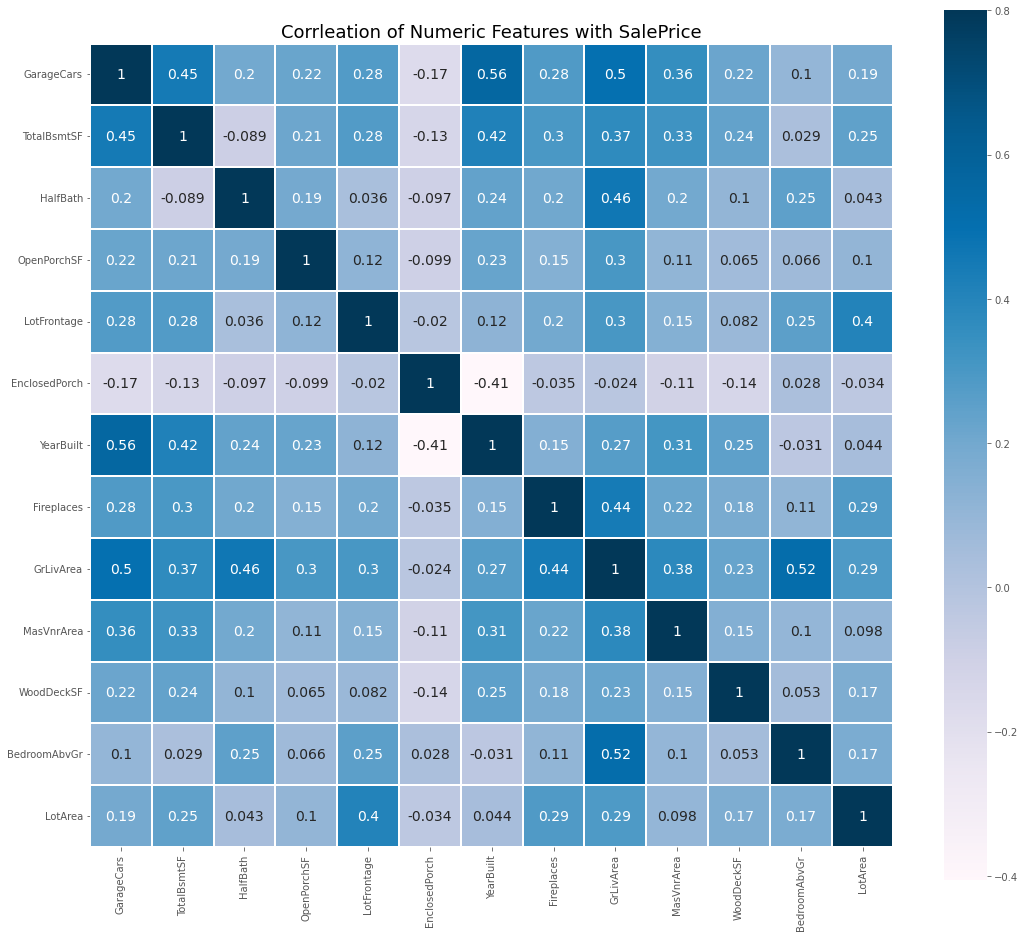

In [29]:
num_features = list(set(num_features) - set(["GarageYrBlt", "TotRmsAbvGrd", "YearRemodAdd"]))

colormap = plt.cm.PuBu
fig, ax = plt.subplots(figsize=(18, 16))
plt.title("Corrleation of Numeric Features with SalePrice", y=1, size=18)
sns.heatmap(df_train[num_features].corr(),
            vmax=.8, # Ïª¨Îü¨Î∞î ÏµúÎåÄ ÌÅ¨Í∏∞
            linewidths=0.1, # Í≤ΩÍ≥ÑÎ©¥ Ïã§ÏÑ†ÏúºÎ°ú Íµ¨Î∂ÑÌïòÍ∏∞
            square=True,
            annot=True, # Ïã§Ï†úÍ∞í ÌëúÏãú o
            cmap=colormap, 
            linecolor="white",
            annot_kws={'size': 14})

## 2.2 ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù (Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞)

In [30]:
null_cat = []
for col in cat_features:
    if df_train[col].isnull().sum() > 0:
        null_cat.append(col)
print(null_cat)
print("\nNull dataÎ•º Í∞ÄÏßÑ Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Ïùò Ïàò: ", len(null_cat))

['PoolQC', 'GarageFinish', 'Electrical', 'BsmtQual', 'BsmtCond', 'GarageCond', 'BsmtExposure', 'FireplaceQu', 'MasVnrType', 'GarageQual', 'Alley', 'BsmtFinType1', 'MiscFeature', 'Fence', 'BsmtFinType2', 'GarageType']

Null dataÎ•º Í∞ÄÏßÑ Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Ïùò Ïàò:  16


- ElectricalÏôÄ MasVnrTypeÏùÄ no data ÏùòÎØ∏Ïùò NAÍ∞Ä ÏïÑÎãå Îã®ÏàúÌïú Í≤∞Ï∏°Ïπò

In [31]:
null_cat = list(set(null_cat) - set(["Electrical", "MasVnrType"]))
print(null_cat)
print("\nNull dataÎ•º Í∞ÄÏßÑ Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Ïùò Ïàò: ", len(null_cat))

['PoolQC', 'GarageQual', 'GarageFinish', 'Alley', 'BsmtFinType1', 'MiscFeature', 'Fence', 'BsmtQual', 'BsmtFinType2', 'BsmtCond', 'GarageCond', 'BsmtExposure', 'GarageType', 'FireplaceQu']

Null dataÎ•º Í∞ÄÏßÑ Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Ïùò Ïàò:  14


In [32]:
# Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ - Í≤∞Ï∏°Ïπò 'None'ÏúºÎ°ú ÎåÄÏ≤¥ÌïòÍ∏∞
# ÎÇòÏ§ëÏóê ÎûúÎç§Ìè¨Î†àÏä§Ìä∏Î•º Ïù¥Ïö©Ìï¥ ÎåÄÏ≤¥ Í∞ÄÎä•?

for col in cat_features:
    df_train[col] = df_train[col].fillna('None')

for col in cat_features:
    df_test[col] = df_test[col].fillna('None')

In [33]:
df_train.isnull().sum().sum(), df_test.isnull().sum().sum()

(0, 0)

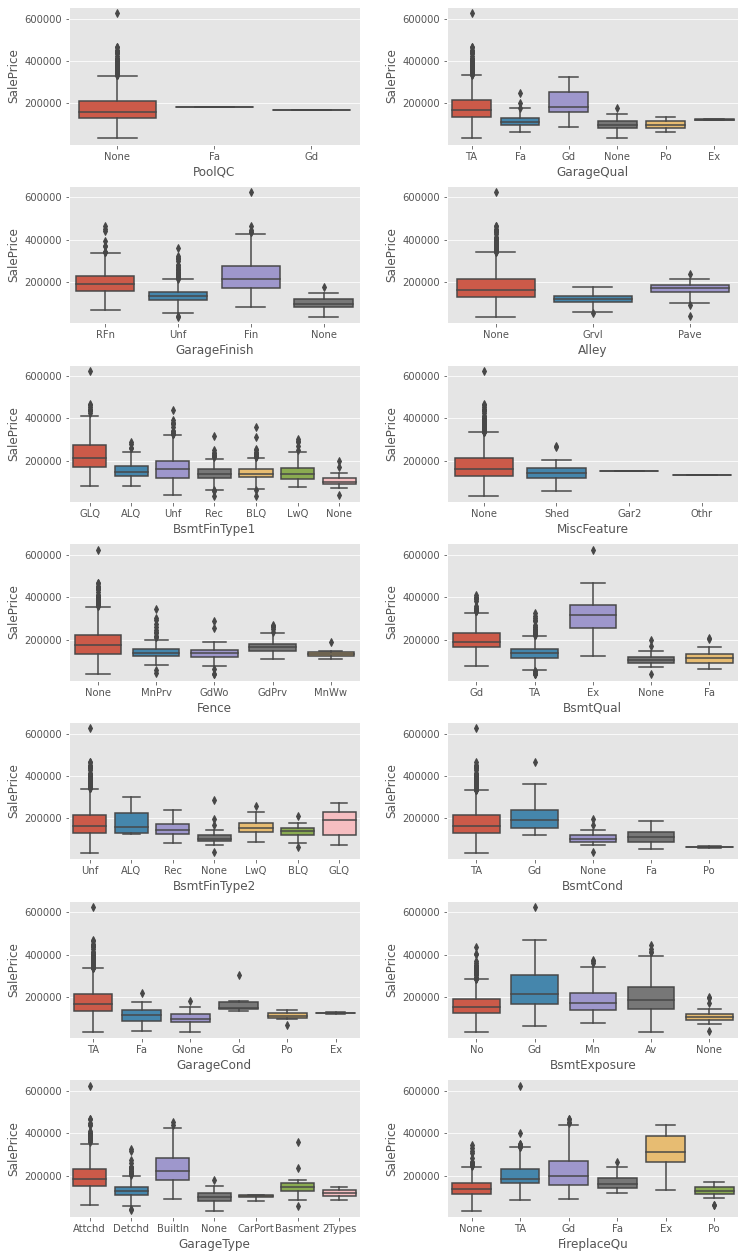

In [34]:
# NoneÏù¥ ÏûàÎäî Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞
f, ax = plt.subplots(7, 2, figsize=(12, 21))

for r in range(0, 7):
    for c in range(0, 2):
        i = r*2+c
        col = null_cat[i]
        sns.boxplot(x=col, y="SalePrice", data=df_train, ax=ax[r][c])
        
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

1. PoolQC, MiscFeature, Alley, Fence ÎåÄÎ∂ÄÎ∂ÑÏù¥ NoneÏù¥Îã§.
    - Í∑∏ÎûòÌîÑÏóêÏÑú Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäî Í≤ΩÏö∞Í∞Ä Ïú†ÏùòÎØ∏Ìï®ÏùÑ ÎÇòÌÉÄÎÇ∏Îã§. -> ÏÇ≠Ï†úÌïòÍ∏∞
2. BsmtFinType2, BmstFinType1Îäî Í∑∏Î†áÍ≤å Ïú†ÏùòÎØ∏Ìïú ÏùòÎØ∏Î•º Í∞ÄÏßÄÏßÄ ÏïäÏùå -> ÏÇ≠Ï†ú

In [35]:
cat_features = list(set(cat_features) - set(null_cat))
print(len(cat_features))

32


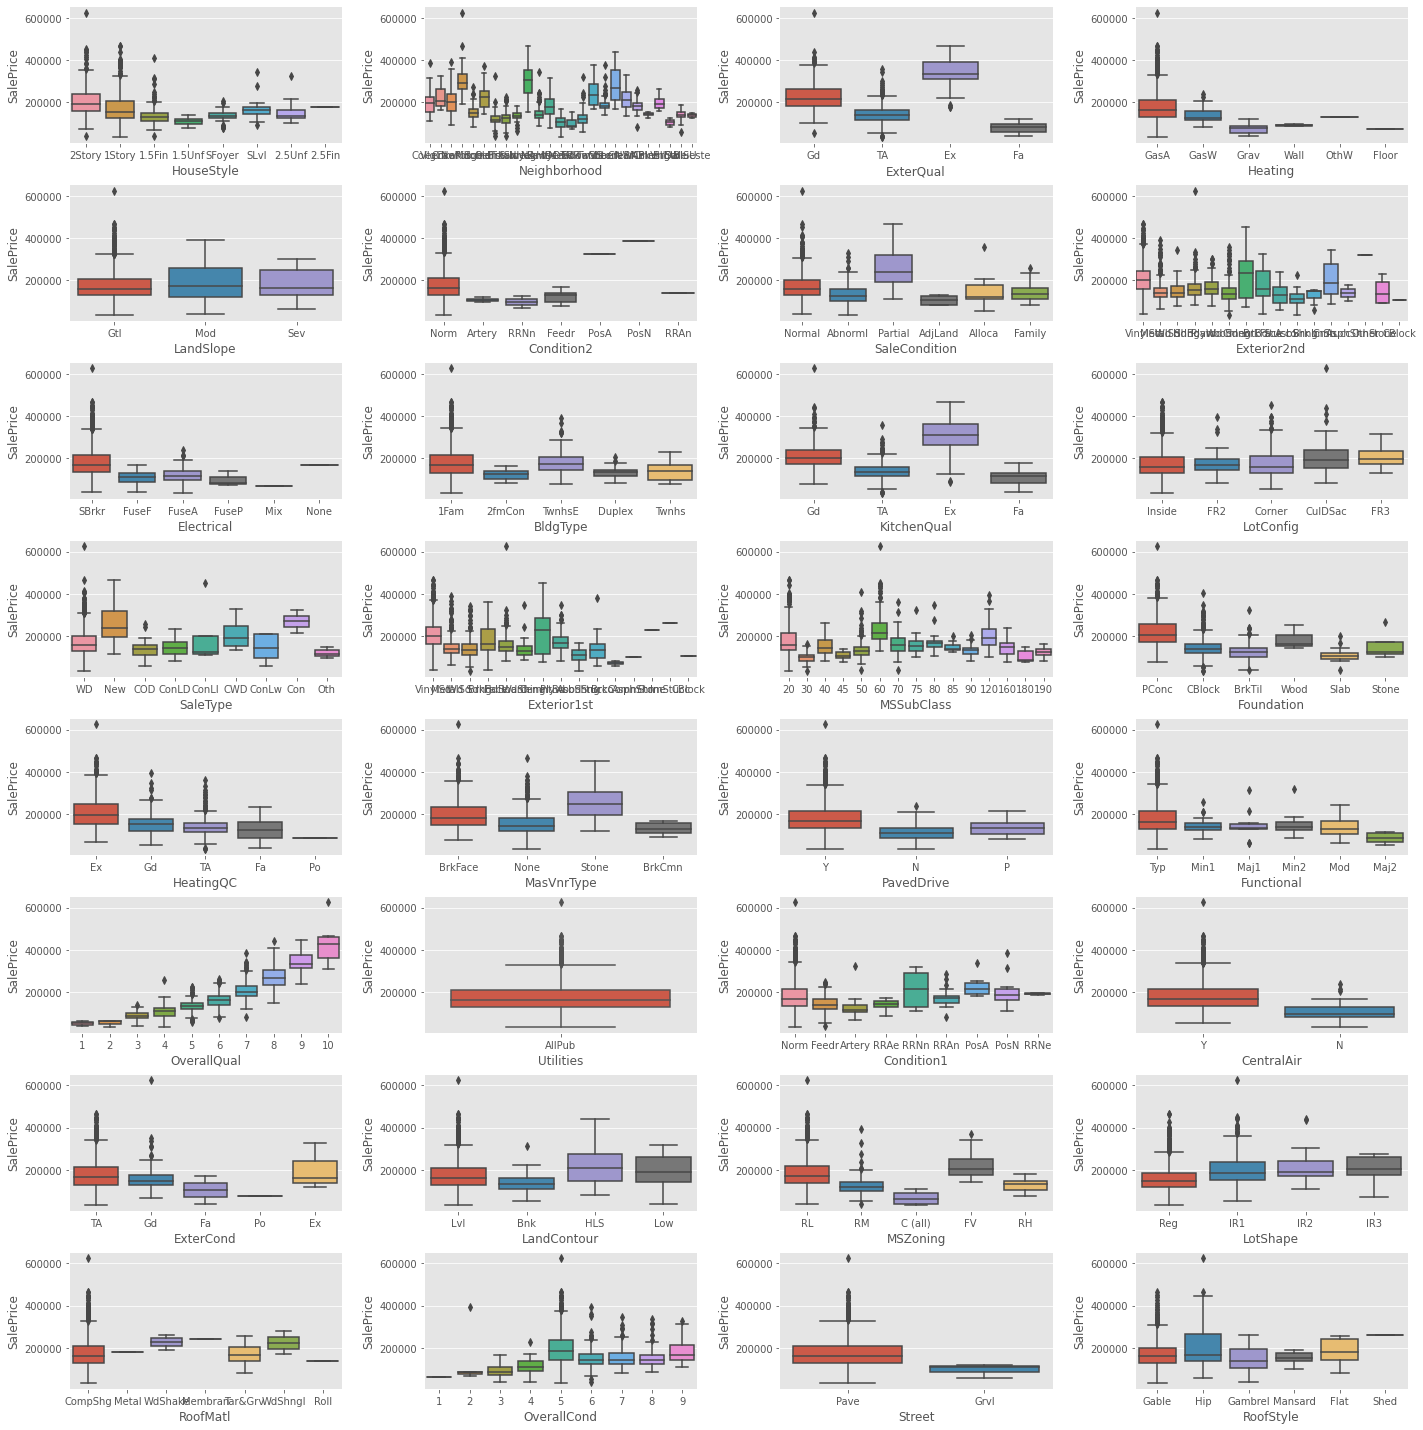

In [36]:
# NoneÏù¥ ÏóÜÎäî Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞
f, ax = plt.subplots(8, 4, figsize=(24, 24))

for r in range(0, 8):
    for c in range(0, 4):
        i = r*4+c
        col = cat_features[i]
        sns.boxplot(x=col, y="SalePrice", data=df_train, ax=ax[r][c])
        
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

- LandSlope, BldgType, RoofMatl, UtilitiesÎäî Ïç© Í¥ÄÍ≥Ñ ÏóÜÏñ¥Î≥¥ÏûÑ -> ÏÇ≠Ï†ú

In [37]:
cat_features = list(set(cat_features) - set(["PoolQC", "MiscFeature", "Alley", "Fence", "BsmtFinType2", "BmstFinType1",
                                            "LandSlope", "BldgType", "RoofMatl", "Utilities"]))

In [38]:
cat_features

['HouseStyle',
 'Neighborhood',
 'ExterQual',
 'Heating',
 'Condition2',
 'SaleCondition',
 'Exterior2nd',
 'Electrical',
 'KitchenQual',
 'LotConfig',
 'SaleType',
 'Exterior1st',
 'MSSubClass',
 'Foundation',
 'HeatingQC',
 'MasVnrType',
 'PavedDrive',
 'Functional',
 'OverallQual',
 'Condition1',
 'CentralAir',
 'ExterCond',
 'LandContour',
 'MSZoning',
 'LotShape',
 'OverallCond',
 'Street',
 'RoofStyle']

In [39]:
df_train.isnull().sum().sum(), df_test.isnull().sum().sum()

(0, 0)

In [40]:
# Ïó¨Í∏∞ÏÑú df_testÏóê nullÍ∞íÏù¥ Ï†ÄÏû•ÎêúÎã§ ,,üòï

keys = []
for col in cat_features:
    keys = df_train[[col, "SalePrice"]].groupby(col).mean().sort_values("SalePrice").apply(dict).to_dict()["SalePrice"].keys()
    keys = list(keys)
    df_train[col] = df_train[col].apply(lambda x: np.nan if x not in keys else keys.index(x))
    df_test[col] = df_test[col].apply(lambda x: np.nan if x not in keys else keys.index(x))

df_train[cat_features].dtypes

HouseStyle       int64
Neighborhood     int64
ExterQual        int64
Heating          int64
Condition2       int64
SaleCondition    int64
Exterior2nd      int64
Electrical       int64
KitchenQual      int64
LotConfig        int64
SaleType         int64
Exterior1st      int64
MSSubClass       int64
Foundation       int64
HeatingQC        int64
MasVnrType       int64
PavedDrive       int64
Functional       int64
OverallQual      int64
Condition1       int64
CentralAir       int64
ExterCond        int64
LandContour      int64
MSZoning         int64
LotShape         int64
OverallCond      int64
Street           int64
RoofStyle        int64
dtype: object

In [41]:
df_train.isnull().sum().sum(), df_test.isnull().sum().sum()

(0, 12)

In [42]:
for col in cat_features:
    if df_test[col].isnull().sum().sum() > 0 :
        df_test[col] = df_test[col].fillna(df_train[col].median())
    
    
# for col in num_features:
#     if df_train[col].isnull().sum() > 0 :
#         df_train[col] = df_train[col].fillna(df_train[col].mean())

In [43]:
df_train.isnull().sum().sum(), df_test.isnull().sum().sum()

(0, 0)

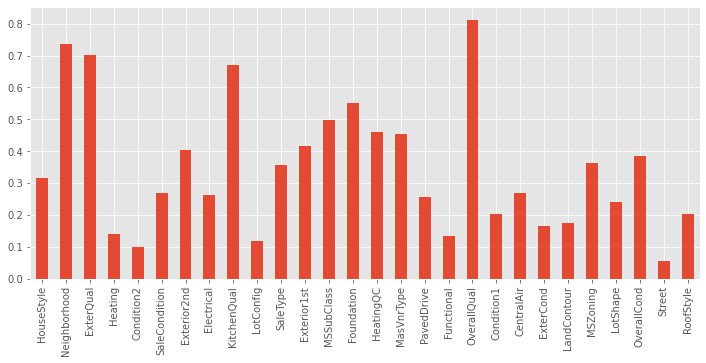

In [44]:
# ÎààÏúºÎ°úÎ≥¥Îã® Ï¢Ä Îçî Ï†ïÌôïÌûà Í∑∏ÎûòÌîÑÎ°ú
plt.figure(figsize=(12, 5))

df_train.corr()["SalePrice"][cat_features].plot.bar()
plt.show()

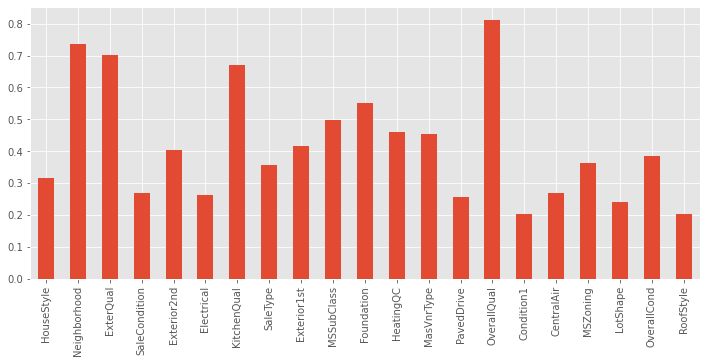

In [45]:
cat_features = list(filter(lambda x: abs(df_train.corr()["SalePrice"][x]) > 0.2, cat_features))

plt.figure(figsize=(12, 5))

df_train.corr()["SalePrice"][cat_features].plot.bar()
plt.show()

OverallQual, Neighborhood, ExterQual, KitchenQual, Foundation, MSSubClass, HeatingQC, MasVnrType, ... ÏàúÏúºÎ°ú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÎã§.

ÌïòÏßÄÎßå Ïù¥Îì§ ÏÑúÎ°úÏÑúÎ°ú ÏÇ¨Ïù¥ÏóêÎèÑ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÏùÑ Ïàò ÏûàÏúºÎØÄÎ°ú heatmapÏùÑ Í∑∏Î†§ ÌôïÏù∏Ìï¥Î≥¥Ïûê

<AxesSubplot:title={'center':'Corrleation of Categorical Features with SalePrice'}>

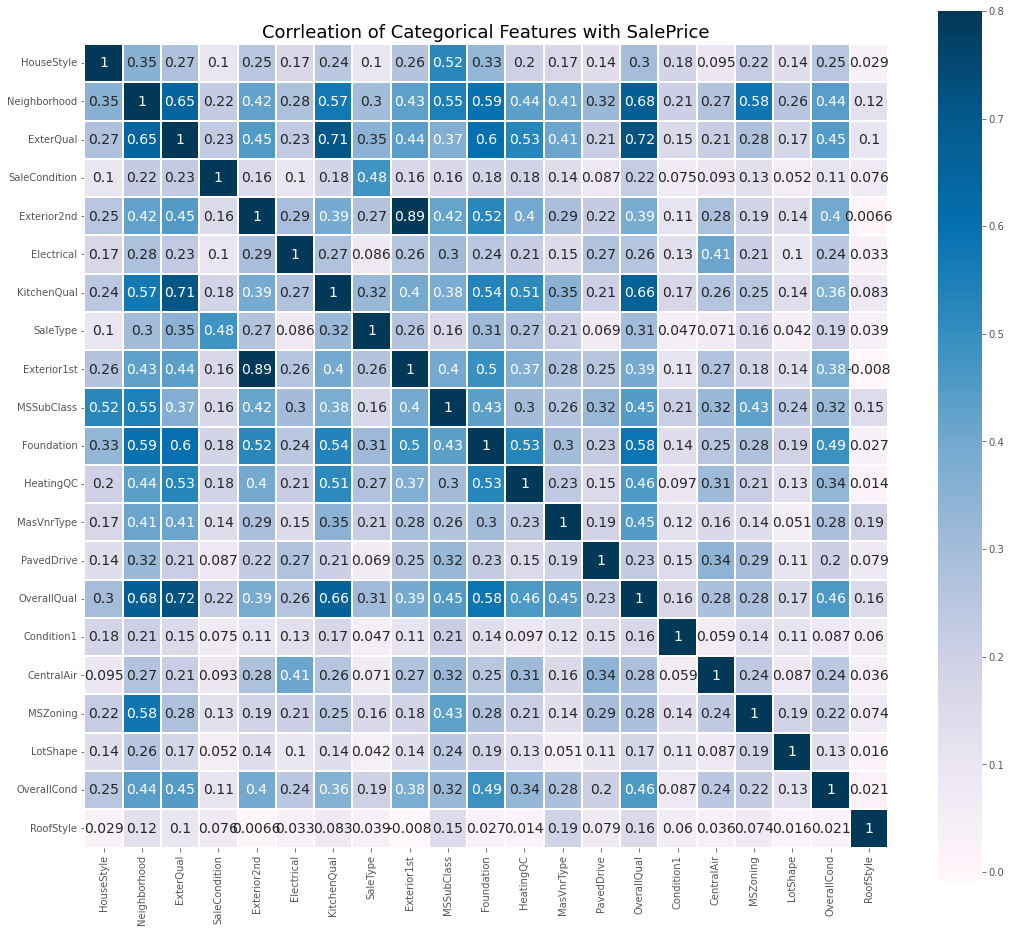

In [46]:
colormap = plt.cm.PuBu
fig, ax = plt.subplots(figsize=(18, 16))
plt.title("Corrleation of Categorical Features with SalePrice", y=1, size=18)
sns.heatmap(df_train[cat_features].corr(),
            vmax=.8, # Ïª¨Îü¨Î∞î ÏµúÎåÄ ÌÅ¨Í∏∞
            linewidths=0.1, # Í≤ΩÍ≥ÑÎ©¥ Ïã§ÏÑ†ÏúºÎ°ú Íµ¨Î∂ÑÌïòÍ∏∞
            square=True,
            annot=True, # Ïã§Ï†úÍ∞í ÌëúÏãú o
            cmap=colormap, 
            linecolor="white",
            annot_kws={'size': 14})

0.6 Ïù¥ÏÉÅ ÏÇ≠Ï†ú
1. OverallQual & ExterQual -> ExterQual ÏÇ≠Ï†ú
2. OverallQual & Neighborhood -> Neighborhood ÏÇ≠Ï†ú
3. OverallQual & KitchenQual -> KitchenQual ÏÇ≠Ï†ú
4. Exterior2nd & Exterior1st -> Exterior2nd ÏÇ≠Ï†ú

<AxesSubplot:title={'center':'Corrleation of Categorical Features with SalePrice'}>

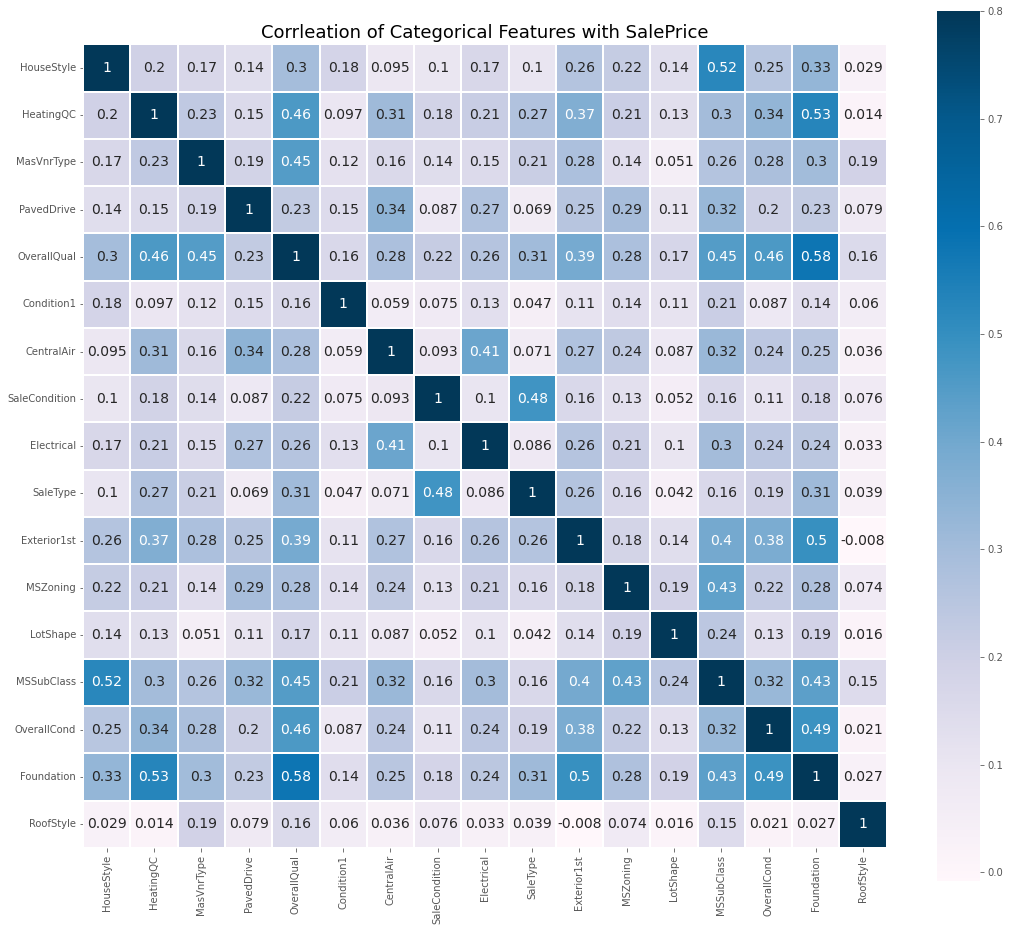

In [47]:
cat_features = list(set(cat_features) - set(["ExterQual", "Neighborhood", "KitchenQual", "Exterior2nd"]))

colormap = plt.cm.PuBu
fig, ax = plt.subplots(figsize=(18, 16))
plt.title("Corrleation of Categorical Features with SalePrice", y=1, size=18)
sns.heatmap(df_train[cat_features].corr(),
            vmax=.8, # Ïª¨Îü¨Î∞î ÏµúÎåÄ ÌÅ¨Í∏∞
            linewidths=0.1, # Í≤ΩÍ≥ÑÎ©¥ Ïã§ÏÑ†ÏúºÎ°ú Íµ¨Î∂ÑÌïòÍ∏∞
            square=True,
            annot=True, # Ïã§Ï†úÍ∞í ÌëúÏãú o
            cmap=colormap, 
            linecolor="white",
            annot_kws={'size': 14})

In [48]:
# ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞
neither = list(set(df_train.columns) - set(num_features) - set(cat_features) - {"SalePrice"})
print("ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞: ", num_features)
print("\nÎ≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞: ", cat_features)
print("\nÏïΩÌïú Îç∞Ïù¥ÌÑ∞: ", neither)

ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞:  ['GarageCars', 'TotalBsmtSF', 'HalfBath', 'OpenPorchSF', 'LotFrontage', 'EnclosedPorch', 'YearBuilt', 'Fireplaces', 'GrLivArea', 'MasVnrArea', 'WoodDeckSF', 'BedroomAbvGr', 'LotArea']

Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞:  ['HouseStyle', 'HeatingQC', 'MasVnrType', 'PavedDrive', 'OverallQual', 'Condition1', 'CentralAir', 'SaleCondition', 'Electrical', 'SaleType', 'Exterior1st', 'MSZoning', 'LotShape', 'MSSubClass', 'OverallCond', 'Foundation', 'RoofStyle']

ÏïΩÌïú Îç∞Ïù¥ÌÑ∞:  ['Neighborhood', 'PoolQC', 'ExterQual', 'Heating', 'GarageFinish', 'MiscVal', 'FullBath', 'LandSlope', 'TotRmsAbvGrd', 'Condition2', 'LowQualFinSF', 'Exterior2nd', 'BldgType', 'BsmtUnfSF', 'BsmtQual', 'KitchenQual', 'LotConfig', 'BsmtHalfBath', 'BsmtCond', 'GarageCond', 'GarageArea', 'BsmtExposure', '3SsnPorch', '1stFlrSF', 'FireplaceQu', 'YearRemodAdd', 'KitchenAbvGr', 'Functional', 'ScreenPorch', 'BsmtFinSF1', 'BsmtFinSF2', 'GarageQual', 'Utilities', 'PoolArea', 'Alley', 'BsmtFinType1', 'MiscFeature', 'MoSo

In [49]:
drop_col = neither

df_train.drop(drop_col, axis=1, inplace=True)
df_test.drop(drop_col, axis=1, inplace=True)

In [50]:
df_train.shape, df_test.shape

((1370, 31), (1459, 30))

## Ï†úÎåÄÎ°ú!!

In [51]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values, convertExp=True):
    
    if convertExp:
        predicted_values = np.exp(predicted_values),
        actual_values = np.exp(actual_values)
    
    # ÎÑòÌååÏù¥Î°ú Î∞∞Ïó¥ ÌòïÌÉúÎ°ú Î∞îÍøîÏ§ÄÎã§.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # ÏòàÏ∏°Í∞í, Ïã§Ï†úÍ∞íÏóê +1ÌïòÍ≥† Î°úÍ∑∏Î•º ÏîåÏö∞Í∏∞
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # (ÏòàÏ∏°Í∞í - Ïã§Ï†úÍ∞í)Ïùò Ï†úÍ≥±
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)
    
    # ÌèâÍ∑†
    mean_difference = difference.mean()
    
    # Î£®Ìä∏
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

Skewness: 1.281826
Kurtosis: 2.517524


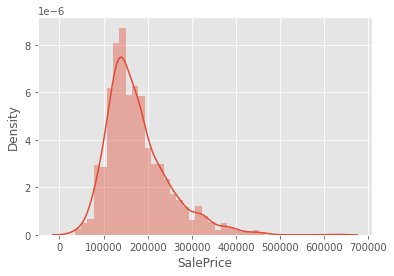

In [52]:
label_name = "SalePrice"
sns.distplot(df_train[label_name])

print("Skewness: %f" % df_train[label_name].skew())
print("Kurtosis: %f" % df_train[label_name].kurt())

Skewness: -0.048061
Kurtosis: 0.607613


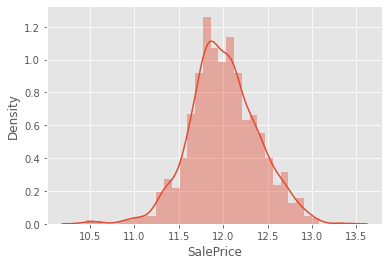

In [53]:
# Î°úÍ∑∏ Ï∑®ÌïòÍ∏∞

df_train[label_name] = df_train[label_name].map(lambda i: np.log(i) if i>0 else 0)
sns.distplot(df_train[label_name])

print("Skewness: %f" % df_train[label_name].skew())
print("Kurtosis: %f" % df_train[label_name].kurt())

In [54]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train = df_train.drop(label_name, axis=1).values
target = df_train[label_name].values # ÏòàÏ∏°Ìï† Í∞í
X_test = df_test.values

X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target, test_size=0.2, random_state=42)

In [55]:
import xgboost
regressor = xgboost.XGBRegressor(colsample_bytree = 0.4603, learning_rate = 0.06, min_child_weight = 1.8,
                                 max_depth= 3, subsample = 0.52, n_estimators = 2000,
                                 random_state= 7)
regressor.fit(X_tr, y_tr)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.06, max_delta_step=0, max_depth=3,
             min_child_weight=1.8, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=4, num_parallel_tree=1, random_state=7,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.52,
             tree_method='exact', validate_parameters=1, verbosity=None)

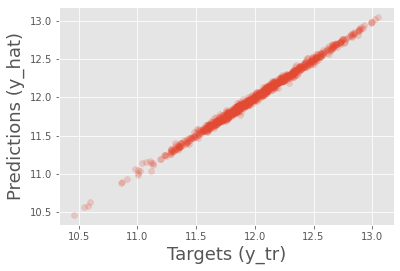

In [56]:
y_hat = regressor.predict(X_tr)

plt.scatter(y_tr, y_hat, alpha = 0.2)
plt.xlabel('Targets (y_tr)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.show()

In [57]:
# Ï†ïÌôïÎèÑ
regressor.score(X_tr, y_tr)

0.9952521728908389

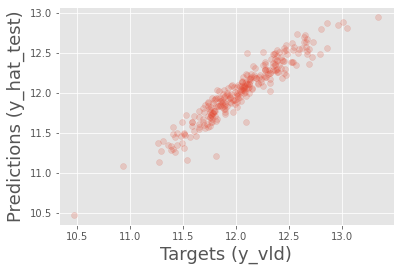

In [58]:
y_hat_test = regressor.predict(X_vld)

plt.scatter(y_vld, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_vld)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.show()

In [59]:
regressor.score(X_vld, y_vld)

0.9009342768482175

In [60]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=regressor, X=X_tr, y=y_tr, cv=10)

In [61]:
print(accuracies.mean())
print(accuracies.std())

0.8791691249939957
0.020956397237920733


In [62]:
pred = regressor.predict(X_test)

sub = pd.DataFrame()
sub['Id'] = id_test
sub['SalePrice'] = pred
sub['SalePrice'] = np.exp(sub['SalePrice'])

sub.to_csv('sub.csv', index=False)


In [63]:
id_test.shape, pred.shape

((1459,), (1459,))